In [54]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga de Datos y Acumulación por Día

In [55]:
folders = ('01-10-19_PT5M','02-10-19_PT5M','05-10-19_PT5M','08-10-19_PT5M')
assets = pd.read_csv('southcentral-asset.csv',sep=';')
datosNTO={}

for i,r in assets.iterrows():
    #print(r.Name)
    ultimoMin = 0
    for j in np.arange(0,len(folders)):
        with open(folders[j]+'/'+r.File, 'r') as f:
            datastore = json.load(f)
            #print('File readed:'+folders[j]+'/'+r.File)
        #tempCPU = pd.DataFrame(datastore["value"][0]["metricValues"])
        #tempNTI = pd.DataFrame(datastore["value"][1]["metricValues"])
        tempNTO = pd.DataFrame(datastore["value"][2]["metricValues"])
        tempMin = np.arange(ultimoMin,ultimoMin+(tempNTO.shape[0]*5),step=5)
        #tempCPU['minute'] = tempMin
        #tempNTI['minute'] = tempMin
        tempNTO['minute'] = tempMin
        ultimoMin = tempMin[len(tempMin)-1]+5
        #print(ultimoMin)
        #tempCPU = tempCPU.dropna(axis=0,how='any')
        #tempNTI = tempNTI.dropna(axis=0,how='any')
        tempNTO = tempNTO.dropna(axis=0,how='any')
        if r.Name in datosNTO:
            #datosCPU[r.Name] = datosCPU[r.Name].append(tempCPU)
            #datosNTI[r.Name] = datosNTI[r.Name].append(tempNTI)
            datosNTO[r.Name] = datosNTO[r.Name].append(tempNTO)
        else:
            #datosCPU[r.Name] = tempCPU
            #datosNTI[r.Name] = tempNTI
            datosNTO[r.Name] = tempNTO

In [56]:
accumNTO={}
for i,r in assets.iterrows():
    for d in np.arange(1,11):
        temp = datosNTO[r.Name][(datosNTO[r.Name]['minute'] >= ((d-1)*1440)) & (datosNTO[r.Name]['minute'] < (d*1440))]
        sumx = temp.apply(np.sum,axis= 0)
        accumNTO[str(d)+'-'+r.Name] = pd.DataFrame(sumx[1:5])

In [57]:
def obtenerDatosAcumulados(nombreEmpresa):
    total = np.array([[1,accumNTO['1-'+nombreEmpresa].transpose()['total'][0]]])
    total = np.append(total, [[2,accumNTO['2-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[3,accumNTO['3-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[4,accumNTO['4-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[5,accumNTO['5-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[6,accumNTO['6-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[7,accumNTO['7-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[8,accumNTO['8-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[9,accumNTO['9-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[10,accumNTO['10-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    acumm = pd.DataFrame(total,columns=['dia','acumulado'])
    acumm = acumm.dropna(axis=0,how='any')
    return acumm

In [194]:
acumulados = {}
totalizadoDia=pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9])
for i,r in assets.iterrows():
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    t = Acumm.transpose()[1:]
    t.index = [company]
    totalizadoDia = totalizadoDia.append(t)

# Pruebas de Normalidad

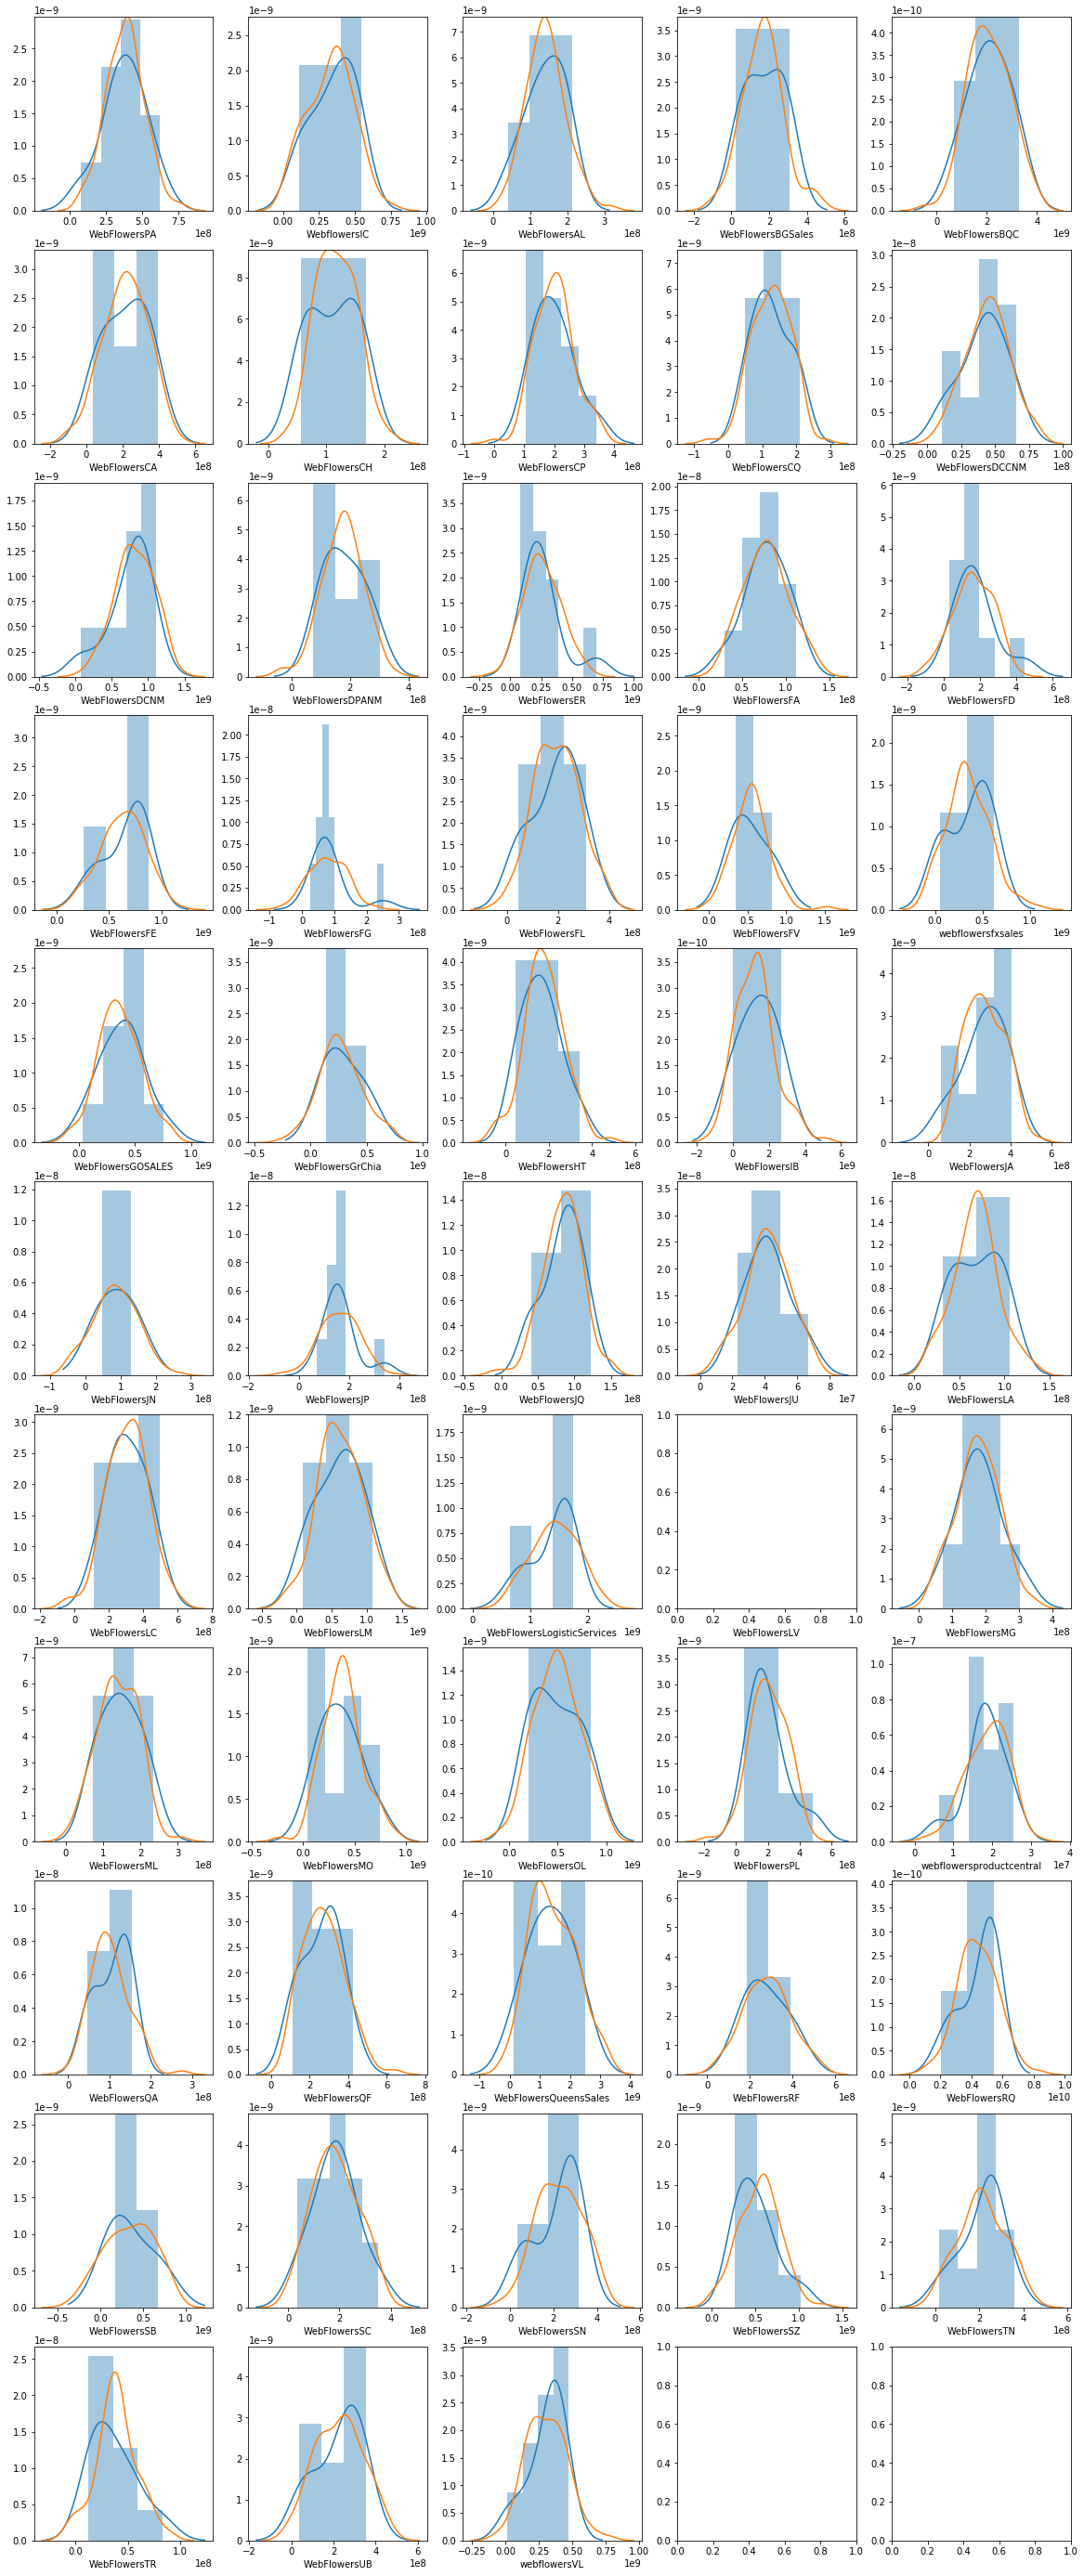

In [67]:
fig, axs = plt.subplots(11,5,figsize=(20,50))
for r in np.arange(0,11):
    for c in np.arange(0,5):
        if(r*5+c < 53):
            company = assets.Name[r*5+c]
            axs[r][c].set_xlabel(company)
            if(len(acumulados[company]['acumulado'])>1):
                m = acumulados[company].describe()['acumulado']['mean']
                s = acumulados[company].describe()['acumulado']['std']
                #data=acumulados[company].apply(lambda x: (x.acumulado-m)/s,axis=1)
                #normal = np.random.normal(size=100)
                data = acumulados[company]['acumulado']
                normal = np.random.normal(loc=m,scale=s,size=100)
                sns.distplot(data,ax=axs[r][c],axlabel=False)
                sns.distplot(normal, hist=False,ax=axs[r][c])

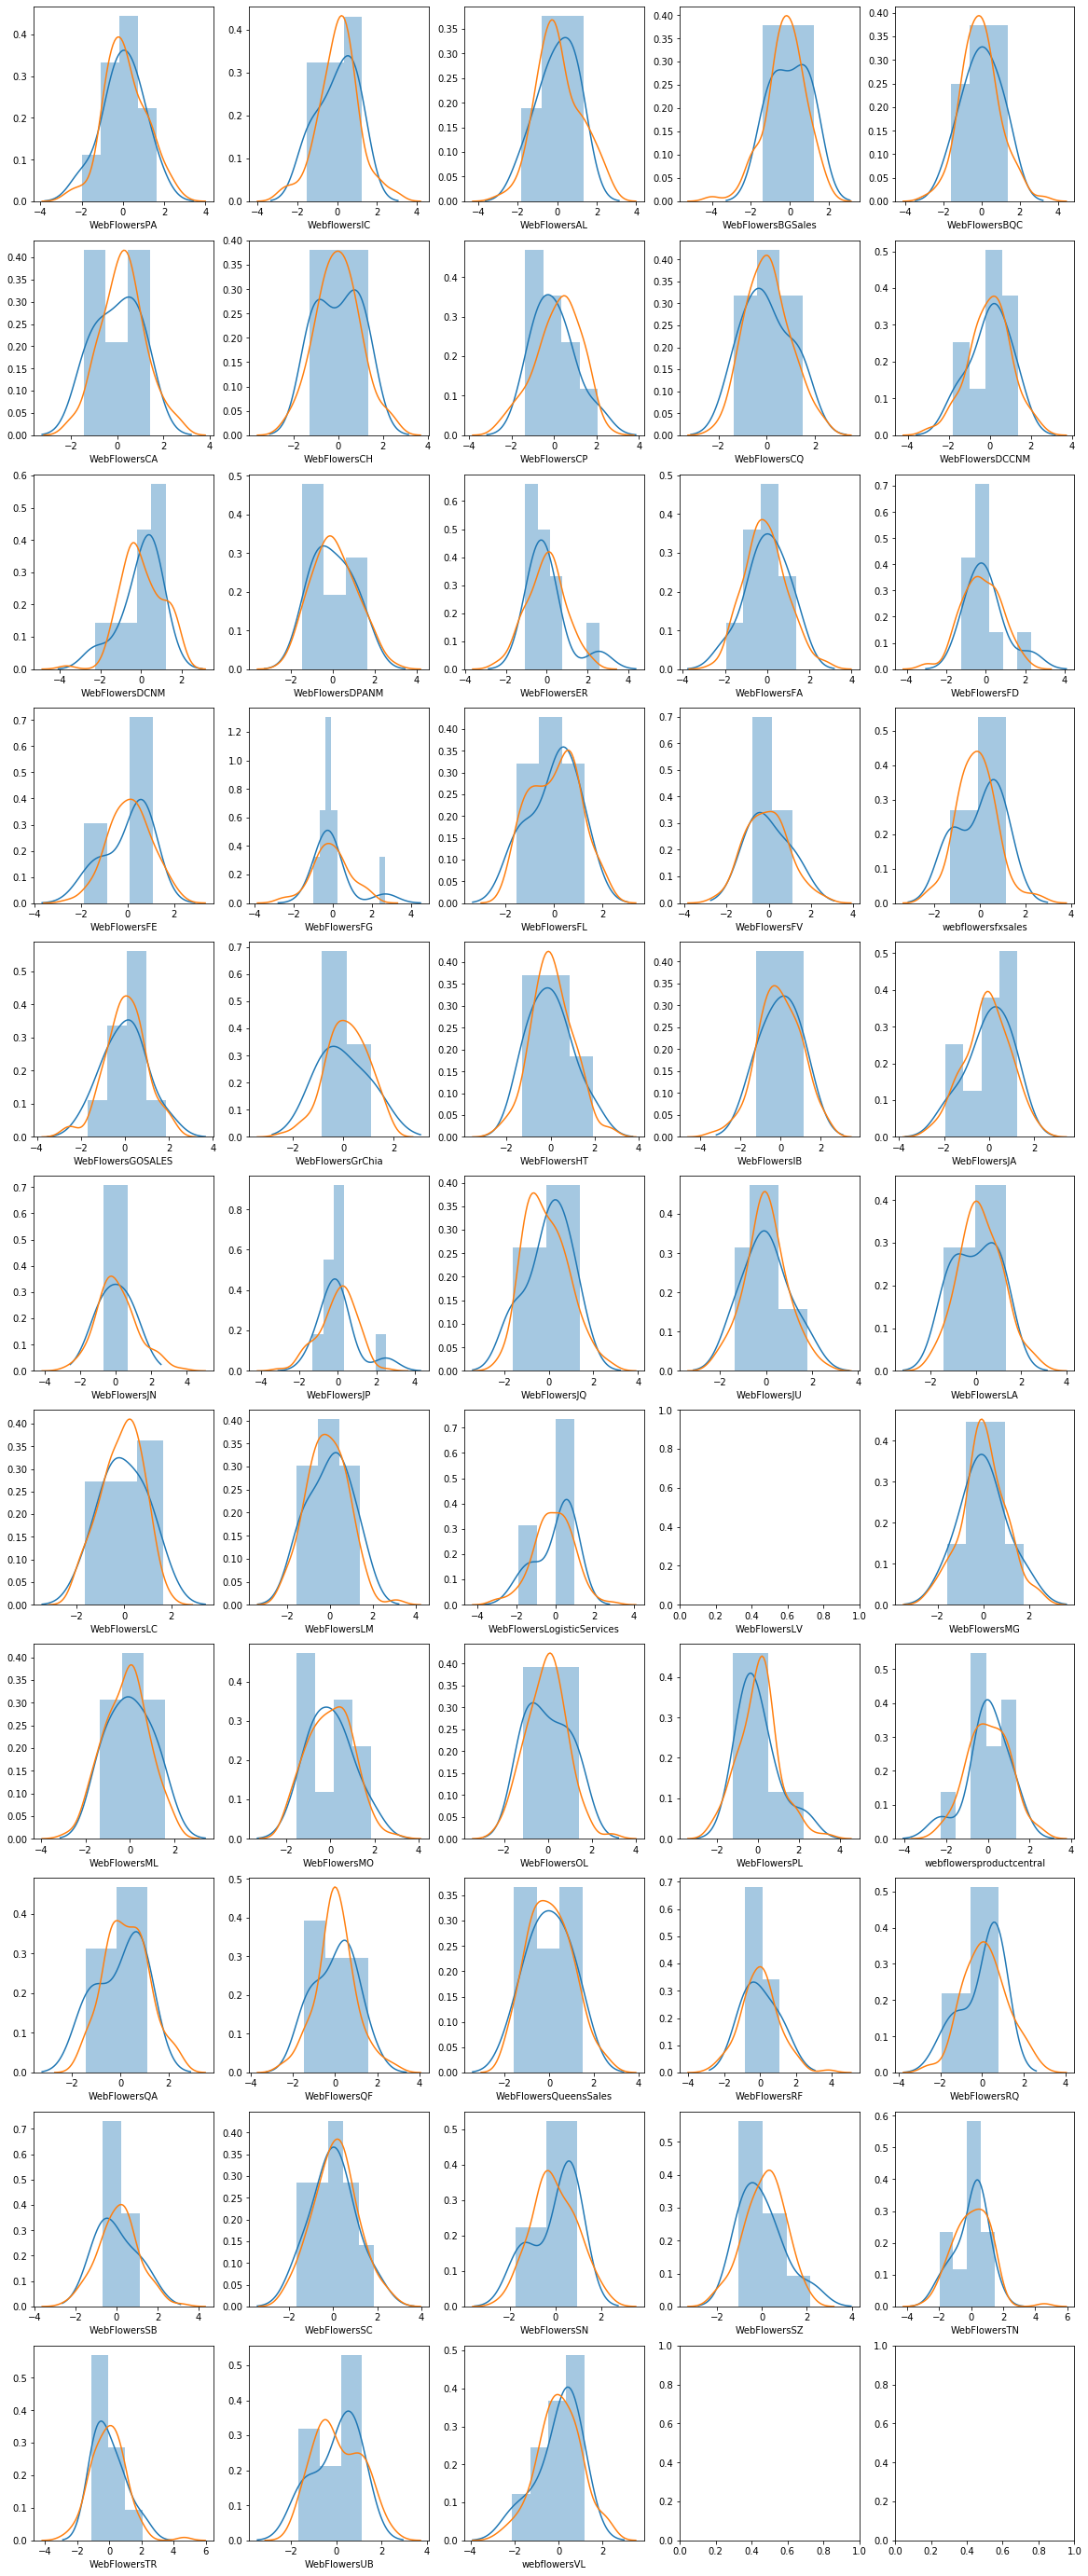

In [65]:
fig, axs = plt.subplots(11,5,figsize=(20,50))
for r in np.arange(0,11):
    for c in np.arange(0,5):
        if(r*5+c < 53):
            company = assets.Name[r*5+c]
            axs[r][c].set_xlabel(company)
            if(len(acumulados[company]['acumulado'])>1):
                m = acumulados[company].describe()['acumulado']['mean']
                s = acumulados[company].describe()['acumulado']['std']
                data=acumulados[company].apply(lambda x: (x.acumulado-m)/s,axis=1)
                normal = np.random.normal(size=100)
                #data = acumulados[company]['acumulado']
                #normal = np.random.normal(loc=m,scale=s,size=100)
                sns.distplot(data,ax=axs[r][c],axlabel=False)
                sns.distplot(normal, hist=False,ax=axs[r][c])

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [71]:
mc = MultiComparison(acumulados)

TypeError: __init__() missing 1 required positional argument: 'groups'

In [209]:
totalizadoDia =  totalizadoDia.dropna(axis=0,how='any')

In [196]:
from sklearn.cluster import KMeans

In [206]:
y_pred = KMeans(n_clusters=3).fit_predict(totalizadoDia)

In [211]:
totalizadoDia['Grupo'] = y_pred
totalizadoDia

,0,1,2,3,4,5,6,7,8,9,Grupo
WebFlowersPA,4.013573e+08,5.099922e+08,6.186972e+08,2.968956e+08,7.681846e+07,2.624565e+08,4.573972e+08,3.603891e+08,4.563849e+08,3.059878e+08,0
WebflowersIC,2.932861e+08,4.889940e+08,3.887221e+08,4.995303e+08,2.376019e+08,1.183867e+08,5.439454e+08,4.462929e+08,3.645832e+08,1.104834e+08,0
WebFlowersAL,8.177403e+07,1.783251e+08,2.135269e+08,1.831840e+08,3.880413e+07,1.212145e+08,1.937350e+08,1.499862e+08,1.393014e+08,1.024652e+08,0
WebFlowersCA,3.487677e+07,3.576099e+08,2.868650e+08,2.033451e+08,5.189064e+07,1.435156e+08,2.675278e+08,3.093920e+08,3.949306e+08,1.283733e+08,0
WebFlowersCH,7.417093e+07,1.089501e+08,1.691097e+08,1.553461e+08,7.438763e+07,5.708886e+07,1.434303e+08,1.520780e+08,1.206286e+08,5.951475e+07,0
WebFlowersCP,1.585217e+08,2.125141e+08,2.486955e+08,3.408571e+08,1.301966e+08,1.616239e+08,2.520290e+08,1.729710e+08,2.101622e+08,1.062775e+08,0
WebFlowersCQ,8.088768e+07,2.095986e+08,1.292109e+08,1.164492e+08,5.025915e+07,1.987587e+08,1.839928e+08,1.112970e+08,1.199438e+08,5.844202e+07,0
WebFlowersDCCNM,4.248883e+07,4.280466e+07,6.532125e+07,1.922974e+07,4.253157e+07,4.521147e+07,3.146709e+07,6.092029e+07,5.410000e+07,1.095719e+07,0
WebFlowersDCNM,8.486025e+08,1.111786e+09,8.056757e+08,6.088231e+08,7.530819e+07,7.844064e+08,9.293575e+08,9.301172e+08,9.452252e+08,4.721998e+08,2
WebFlowersDPANM,2.086459e+08,2.334484e+08,1.444222e+08,1.296222e+08,7.359084e+07,1.431965e+08,2.641722e+08,1.983487e+08,3.008314e+08,1.067363e+08,0


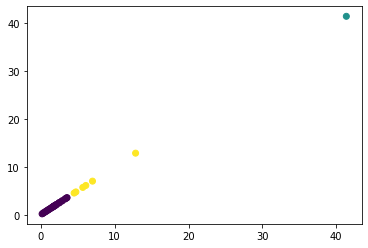

In [214]:
s=totalizadoDia.apply(np.sum,axis=1)/math.pow(1024,3)
plt.scatter(s,s,c=y_pred);

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
total